# Online Handwritten Digit Recognition

In [54]:
import gradio as gr
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [20]:
plt.style.use('dark_background')

In [21]:
# fetch mnist datase
mnist = fetch_openml('mnist_784', version=1)

In [22]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [30]:
X = mnist['data']
y = mnist['target']

### EDA

In [32]:
X.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

Number: 5


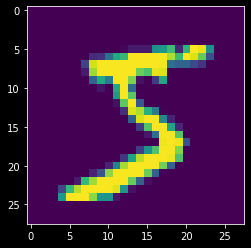

In [130]:
# visualise a given digit
digit = X.iloc[0].values.reshape(28, 28) # reshape row 28x28 2d matrix for representing the digit
print(f'Number: {y.iloc[0]}')
plt.imshow(digit)

<AxesSubplot:>

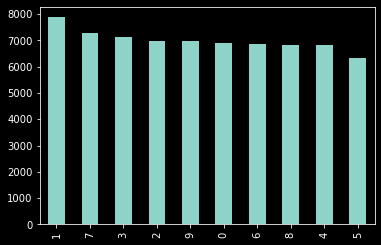

In [24]:
# check observations distribution
y.value_counts().plot(kind='bar')

### Create a Training and a Test Set

In [67]:
X_train, y_train = X[:60_000], y[:60_000]

In [68]:
X_test, y_test = X[60_000:], y[60_000:]

In [69]:
X_train.shape

(60000, 784)

In [70]:
X_test.shape

(10000, 784)

### Model Triage
- Logistic Regression
- Random Forest Classifier
- k-Nearest Neighbors

In [71]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [72]:
lreg = LogisticRegression(random_state=0)
lreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [73]:
y_pred = lreg.predict(X_test)

In [75]:
accuracy = np.mean(y_pred == y_test)
accuracy

0.9255

In [101]:
lreg.score(X_test, y_test)

0.9255

In [79]:
# Predict probabilities
lreg.predict_proba(X_test[0:1])

array([[1.26600023e-06, 1.14589578e-13, 2.15117236e-06, 2.00501668e-03,
        7.00544103e-08, 4.19485049e-06, 7.85482339e-12, 9.97526696e-01,
        2.30630642e-05, 4.37541975e-04]])

In [96]:
y_test.iloc[0]

'7'

### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [103]:
accuracy = rf.score(X_test, y_test)
accuracy

0.9705

In [116]:
# error rate
print(f'Error rate: {1 - accuracy:.4f}')

Error rate: 0.0295


### k-NN

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
accuracy = neigh.score(X_test, y_test)
accuracy

0.9705

In [120]:
# error rate
print(f'Error rate: {1 - accuracy:.4f}')

Error rate: 0.0295


### Stochastic Gradient Descent

In [121]:
from sklearn.linear_model import SGDClassifier

In [123]:
sgd = SGDClassifier(random_state=0)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=0)

In [124]:
accuracy = sgd.score(X_test, y_test)
accuracy

0.8592

In [125]:
# error rate
print(f'Error rate: {1 - accuracy:.4f}')

Error rate: 0.1408


### Inference

In [131]:
img = X.iloc[0].values.reshape(28, 28)

In [135]:
digits_probs = rf.predict_proba(img.reshape(1,-1))
digits_probs

array([[0.  , 0.  , 0.01, 0.06, 0.  , 0.87, 0.02, 0.01, 0.02, 0.01]])

In [138]:
# making a dictionary for the digits probabilities
labels_confidences = dict(enumerate(digits_probs.flatten(), 0))

In [139]:
print(labels_confidences)

{0: 0.0, 1: 0.0, 2: 0.01, 3: 0.06, 4: 0.0, 5: 0.87, 6: 0.02, 7: 0.01, 8: 0.02, 9: 0.01}


## Deploy

In [140]:
def recognize_digit(img):
    img = img.reshape(1,-1)
    y_proba = rf.predict_proba(img)
    return dict(enumerate(y_proba.flatten(), 0)) # labels and confidences

gr.Interface(fn=recognize_digit, inputs="sketchpad", outputs="label").launch();

Running locally at: http://127.0.0.1:7864/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


Tip: Add interpretation to your model by simply adding `interpretation="default"` to `Interface()`
